<a href="https://colab.research.google.com/github/SridharSurapaneni07/AAI-521/blob/main/Sridhar_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Part 1- Neural Network**

In [4]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import pathlib
import matplotlib.pyplot as plt
import keras.datasets.fashion_mnist as fashion_mnist

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


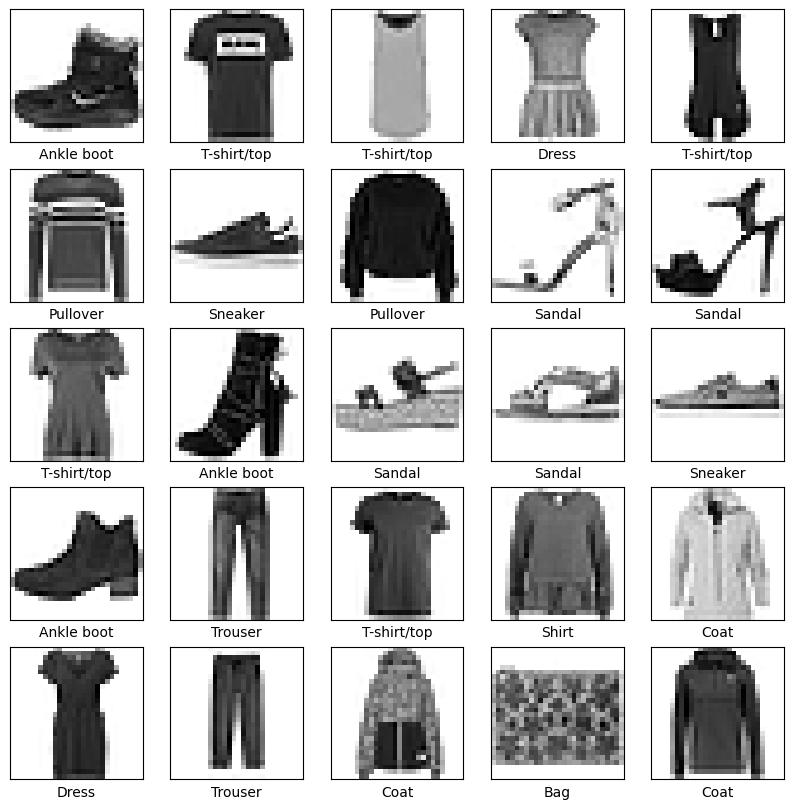

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# plot 4 images as gray scale
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [3]:
# flatten 28*28 images to a 784 vector for each image
IMG_HEIGHT=28
IMG_WIDTH= 28
channels =1

In [4]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [5]:
#Create the model here
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH)),
                             tf.keras.layers.Dense(128, activation= 'relu'),
                             tf.keras.layers.Dense(10, activation= 'softmax')])
model.compile(optimizer='adam', loss= loss_fn, metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
# Train the model here
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=128)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7320 - loss: 0.7891 - val_accuracy: 0.8504 - val_loss: 0.4311
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8505 - loss: 0.4276 - val_accuracy: 0.8652 - val_loss: 0.3955
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8705 - loss: 0.3667 - val_accuracy: 0.8604 - val_loss: 0.3853
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8723 - loss: 0.3567 - val_accuracy: 0.8667 - val_loss: 0.3805
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8808 - loss: 0.3292 - val_accuracy: 0.8747 - val_loss: 0.3438
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8922 - loss: 0.3039 - val_accuracy: 0.8773 - val_loss: 0.3458
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8952 - loss: 0.2881 - val_accuracy: 0.8814 - val_loss: 0.3355
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8997 - loss: 0.2762 - val_accuracy: 0.

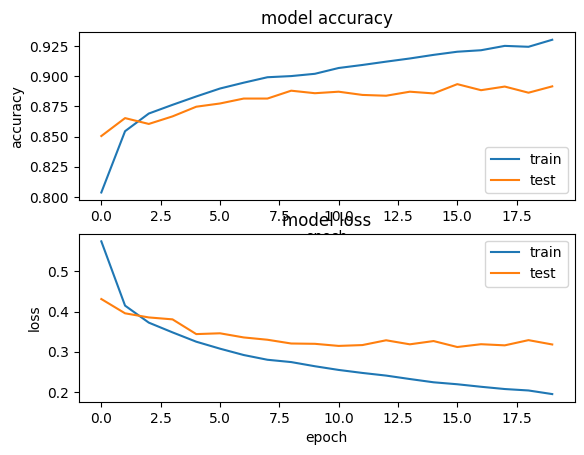

In [7]:
plt.subplot(2,1,1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.show()

The model is a simple sequential neural network with one flattened layer, one dense hidden layer with 128 neurons and ReLU activation, and an output layer with 10 neurons and softmax activation. It was compiled with the Adam optimizer and sparse categorical crossentropy loss.

During training, the model's accuracy on the training data steadily increased, while the loss decreased. The validation accuracy also improved, but with some fluctuations, and it is slightly lower than the training accuracy. This suggests the model is performing well but there might be a slight overfitting to the training data.

**Part 2- Image Processing**

Load the Flower photo dataset from tensorflow repository

In [13]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url,
                                   fname='flower_photos',
                                   untar=True)
data_dir = pathlib.Path(data_dir) / 'flower_photos'

*a) How many images we can find in this dataset?*




In [15]:
image_count = len(list(data_dir.glob('*/*.jpg')))  #This will count all the file with extension of jpg- You have to modify this part
print(f"Image count: {image_count}")

Image count: 3670


*b) The list of subfolders are:*
*   daisy
*   dandelion
*   roses
*   sunflowers
*   tulips

You can look into any of the subfolders to see images stored over there. You can look into the folder using: data_dir.glob('tulips/*')
For this part use Pillow (PIL) to show at least one flower from each subfolder


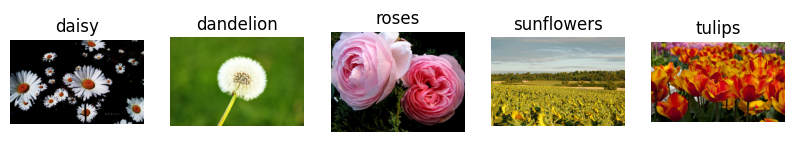

In [17]:
class_names = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
plt.figure(figsize=(10, 10))
for i in range(len(class_names)):
    flower_path = list(data_dir.glob(class_names[i] + '/*.jpg'))
    if flower_path:
        img = PIL.Image.open(str(flower_path[0]))
        plt.subplot(1, len(class_names), i + 1)
        plt.imshow(img)
        plt.title(class_names[i])
        plt.axis("off")
plt.show()

*c) Use Keras to resize all the images into same dimension 180x180*

In [18]:
batch_size = 32
img_height = 180
img_width = 180

In [20]:
# Convert all the images in data_dir folder into 180x180 using tf.kera.utils.image_dataset_from_directory
# Modify following code
train_ds = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 3670 files belonging to 5 classes.


In [21]:
# Use the same strategy to create validation data, this time from validation subset
val_ds = tf.keras.utils.image_dataset_from_directory(data_dir)


Found 3670 files belonging to 5 classes.


d) *You can use* `train_ds.class_names` *command to get the list of labels. Write a code to randomly show 9 images from training data while printing their label on top of the image.*

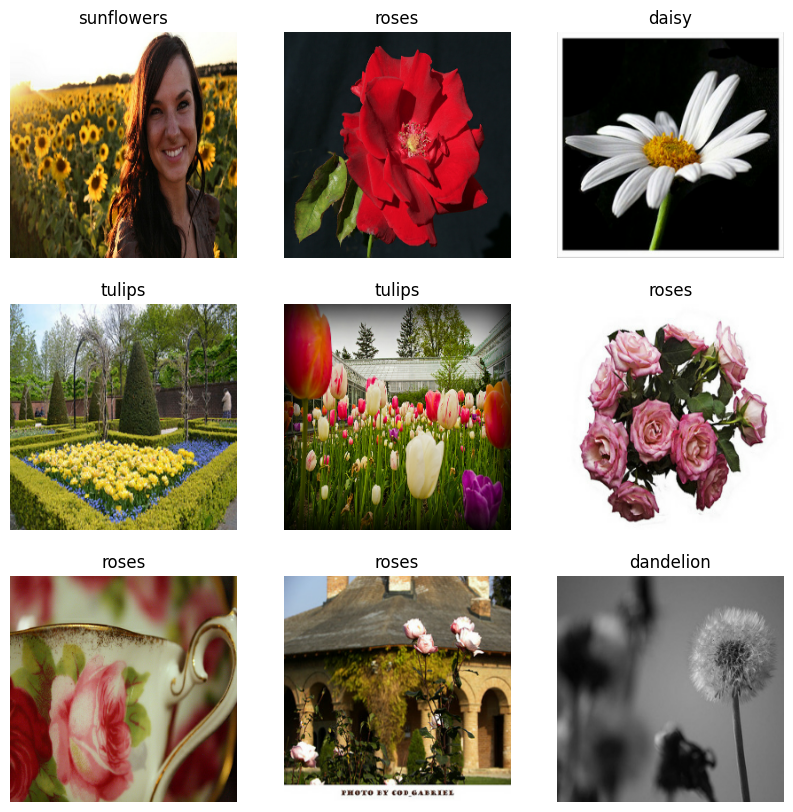

In [22]:
class_names = train_ds.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
plt.show()

*e* - *Now, we want to use preprocessing package in Keras to apply different filters to the image. Apply the following procedures to image data:*
- *Rescale the image by dividing by 255*
- *Shear the image 20%*
- *Zoom the image 20%*
- *Horizontally flip the images*

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

training_set = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 3670 images belonging to 5 classes.


**Part 3- OPENCV**- Now use opencv for preprocessing. Show first 9 images in dataset using Opencv. Before showing each image, resize the images to 180x180.

Shape of resized image 1: (180, 180, 3)
Shape of resized image 2: (180, 180, 3)
Shape of resized image 3: (180, 180, 3)
Shape of resized image 4: (180, 180, 3)
Shape of resized image 5: (180, 180, 3)
Shape of resized image 6: (180, 180, 3)
Shape of resized image 7: (180, 180, 3)
Shape of resized image 8: (180, 180, 3)
Shape of resized image 9: (180, 180, 3)


<Figure size 1000x1000 with 0 Axes>

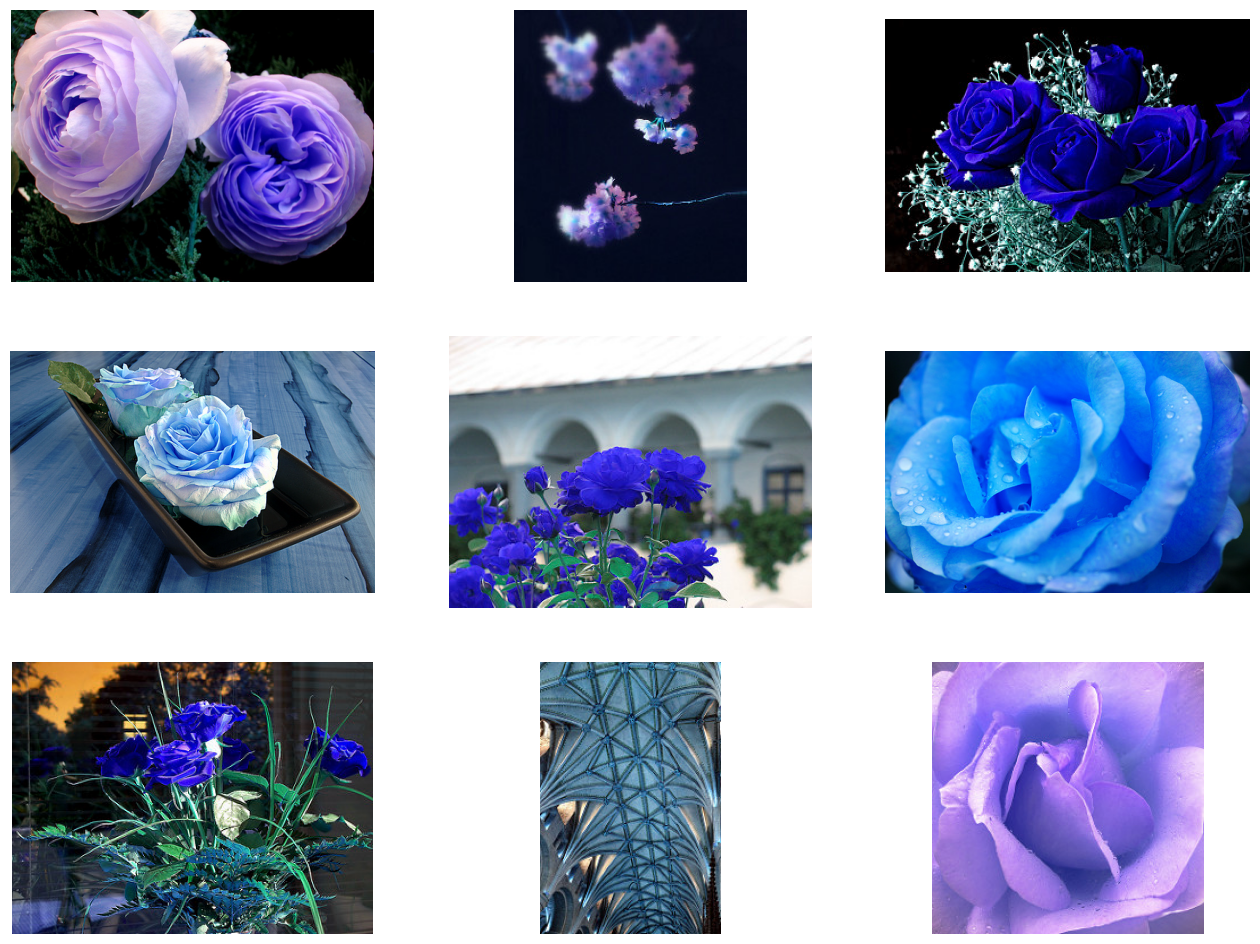

In [28]:
import cv2
list_of_images= list(data_dir.glob('*/*.jpg'))
class_names = train_ds.class_names
plt.figure(figsize=(10, 10))
fig=plt.figure(figsize=(16, 12))

for i in range(9):
    img_path = str(list_of_images[i])
    img = cv2.imread(img_path)
    resized_img = cv2.resize(img, (img_width, img_height))
    print(f"Shape of resized image {i+1}: {resized_img.shape}")
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.axis("off")

plt.show()

OpenCV uses BGR as its default colour order for images, matplotlib uses RGB. When you display an image loaded with OpenCv in matplotlib the channels will be back to front.
The easiest way of fixing this is to use OpenCV to explicitly convert it back to RGB, much like you do when creating the greyscale image.
`RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)`

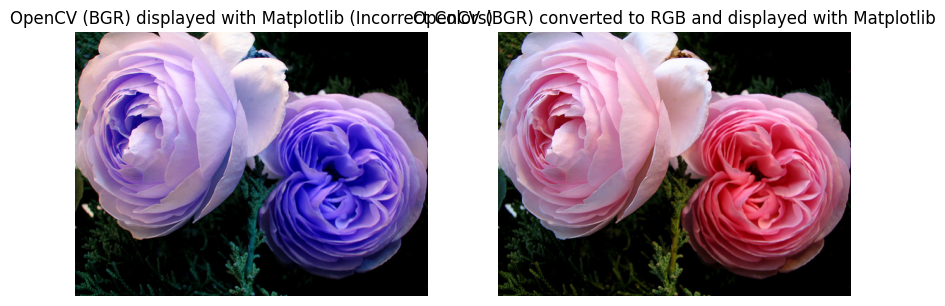

In [27]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Get a list of all image files
list_of_images = list(data_dir.glob('*/*.jpg'))

# Load an image using OpenCV (BGR format)
img_path = str(list_of_images[0]) # Use the first image as an example
img_bgr = cv2.imread(img_path)

# Display the image directly using Matplotlib (will have incorrect colors)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_bgr)
plt.title("OpenCV (BGR) displayed with Matplotlib (Incorrect Colors)")
plt.axis("off")

# Convert the image from BGR to RGB
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Display the corrected image using Matplotlib
plt.subplot(1, 2, 2)
plt.imshow(img_rgb)
plt.title("OpenCV (BGR) converted to RGB and displayed with Matplotlib")
plt.axis("off")

plt.show()